In [1]:
#!python3 -m pip install --user pybaobab-0.1-py3-none-any.whl
#!python3 -m pip install --user matplotlib
!python3 -m pip install --index-url https://test.pypi.org/simple/ pybaobab==0.0.1

Looking in indexes: https://test.pypi.org/simple/


In [1]:
import pybaobab
import pandas as pd
from scipy.io import arff
from sklearn.tree import DecisionTreeClassifier

In [19]:
data = arff.loadarff('vehicle.arff')
df   = pd.DataFrame(data[0])
df   = df.dropna()

y = list(df['class'])
features = list(df.columns)
features.remove('class')
X = df.loc[:, features]

clf = DecisionTreeClassifier().fit(X, y)

<Figure size 720x720 with 0 Axes>

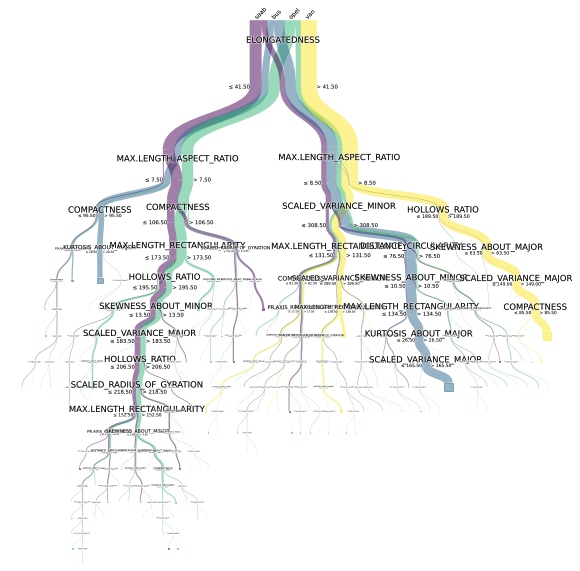

In [20]:
ax = pybaobab.drawTree(clf, size=10, dpi=72, features=features)

In [21]:
ax.get_figure().savefig('tree.png', format='png', dpi=300, transparent=True)

In [22]:
from sklearn.tree import export_graphviz

export_graphviz(
    clf,
    out_file='model.dot',
    feature_names=features,
    rounded=True,
    filled=True)

In [23]:
!dot -Tpng model.dot -o vehicle_dt.png

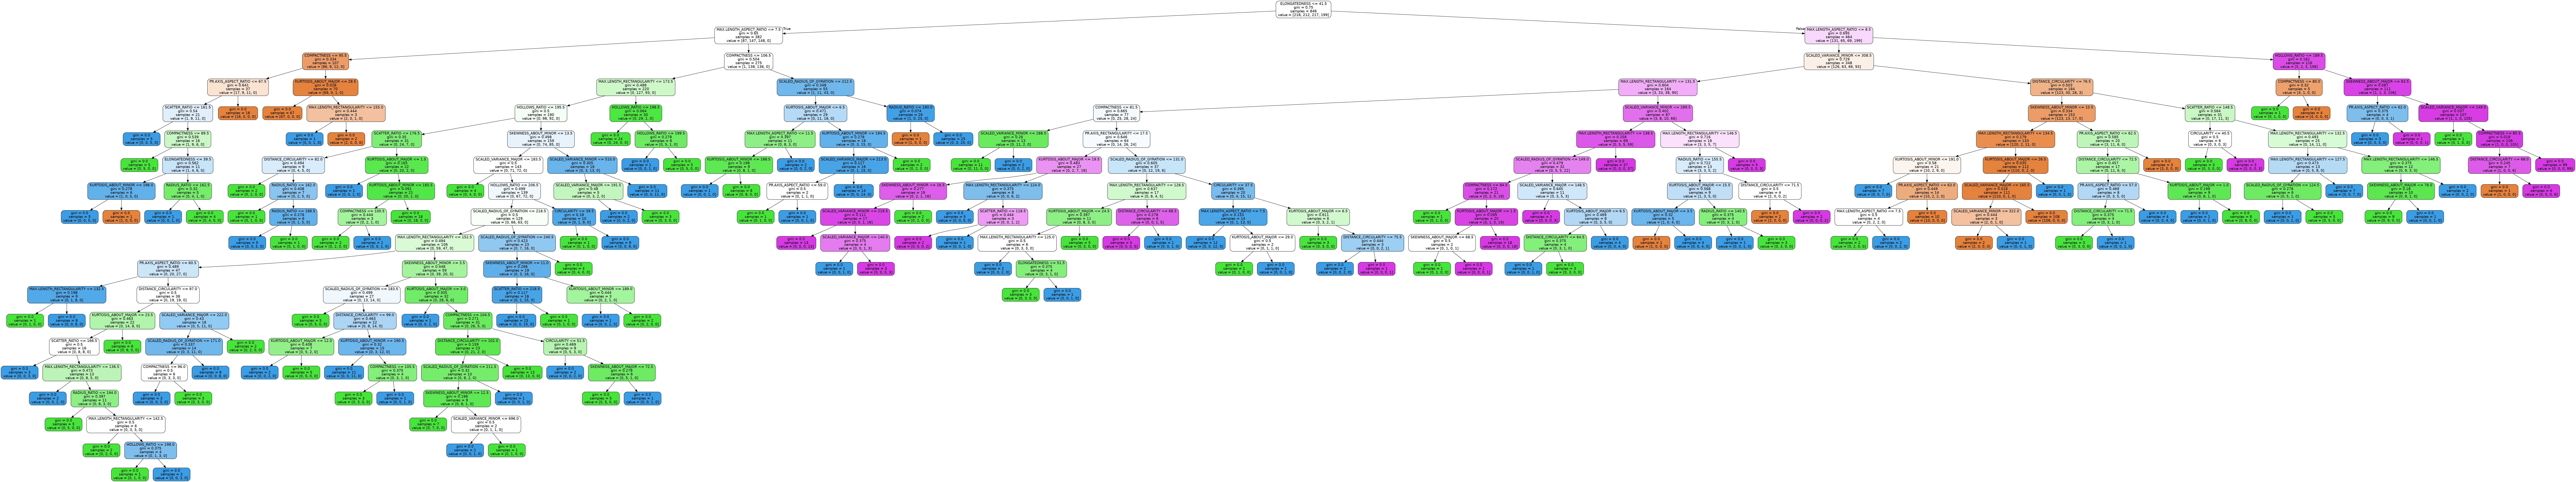

In [24]:
from IPython.display import Image
Image(filename='vehicle_dt.png')